In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# 샘플 데이터셋
data = [
    ("Hello, how are you?", "안녕하세요, 어떻게 지내세요?"),
    ("I am going to the market.", "저는 시장에 가고 있습니다."),
    ("What time is the meeting?", "회의는 몇 시에 시작하나요?"),
    ("She loves to read books.", "그녀는 책 읽는 것을 좋아합니다."),
    ("We need to finish the project by tomorrow.", "우리는 내일까지 프로젝트를 끝내야 합니다."),
    ("Can you help me with this task?", "이 작업을 도와줄 수 있나요?"),
    ("It's raining heavily today.", "오늘 비가 많이 내리고 있습니다."),
    ("The movie was very interesting.", "그 영화는 매우 흥미로웠습니다."),
    ("I will call you later.", "나중에 전화할게요."),
    ("They are planning a trip to Korea.", "그들은 한국 여행을 계획하고 있습니다."),
    ("Where is the nearest bus stop?", "가장 가까운 버스 정류장은 어디인가요?"),
    ("Please send me the report by email.", "이메일로 보고서를 보내주세요."),
    ("I forgot my password.", "비밀번호를 잊어버렸어요."),
    ("We will meet at the coffee shop.", "우리는 커피숍에서 만날 거예요."),
    ("This cake tastes delicious.", "이 케이크 정말 맛있어요."),
    ("Could you open the window?", "창문을 열어줄 수 있나요?"),
    ("My phone battery is dead.", "제 휴대폰 배터리가 다 닳았어요."),
    ("I like to listen to music.", "저는 음악 듣는 것을 좋아해요."),
    ("Let's have dinner together.", "같이 저녁 먹어요."),
    ("I'm looking for a new job.", "새 직장을 찾고 있어요."),
    ("He is a very talented musician.", "그는 매우 재능 있는 음악가입니다."),
    ("Please wait a moment.", "잠시만 기다려 주세요."),
    ("Can I try this on?", "이거 입어봐도 될까요?"),
    ("The weather is getting colder.", "날씨가 점점 추워지고 있어요."),
    ("I will be there in five minutes.", "5분 안에 도착할게요."),
    ("Turn left at the next corner.", "다음 모퉁이에서 좌회전하세요."),
    ("She speaks three languages fluently.", "그녀는 세 가지 언어를 유창하게 말합니다."),
    ("We had a great time yesterday.", "우리는 어제 정말 즐거운 시간을 보냈어요."),
    ("I need some rest.", "저는 좀 쉬어야 해요."),
    ("The store closes at 9 p.m.", "그 가게는 오후 9시에 문을 닫아요."),
    ("Could you recommend a good restaurant?", "좋은 식당 추천해줄 수 있나요?"),
    ("I lost my wallet.", "지갑을 잃어버렸어요."),
    ("Let's watch a movie tonight.", "오늘 밤 영화 보자."),
    ("I have a lot of homework to do.", "해야 할 숙제가 많아요."),
    ("This room needs cleaning.", "이 방은 청소가 필요해요."),
    ("I like your new haircut.", "새로운 헤어스타일이 마음에 들어요."),
    ("Please turn off the lights.", "불을 꺼주세요."),
    ("The book is on the table.", "책은 테이블 위에 있어요."),
    ("We traveled to Paris last summer.", "우리는 지난 여름에 파리를 여행했어요."),
    ("There is a problem with the computer.", "컴퓨터에 문제가 있어요."),
    ("I'm afraid I can't come today.", "죄송하지만 오늘은 갈 수 없어요."),
    ("How much is this jacket?", "이 재킷은 얼마인가요?"),
    ("I need to buy some groceries.", "장 봐야 해요."),
    ("We should leave early.", "우리는 일찍 출발해야 해요."),
    ("Could you speak more slowly?", "조금 천천히 말씀해주실 수 있나요?"),
    ("The meeting was very productive.", "회의가 매우 생산적이었어요."),
    ("I usually wake up at 7 a.m.", "저는 보통 오전 7시에 일어나요."),
    ("I'm not feeling well today.", "오늘 몸이 좀 안 좋아요."),
    ("I enjoy hiking in the mountains.", "산에서 하이킹하는 것을 즐깁니다."),
    ("What did you do over the weekend?", "주말에 뭐 했어요?"),
    ("Please write it down.", "그걸 적어주세요."),
    ("He forgot to bring his passport.", "그는 여권을 가져오는 것을 잊었어요."),
    ("We are moving to a new house.", "우리는 새 집으로 이사할 거예요."),
    ("This coffee is too hot.", "이 커피는 너무 뜨거워요."),
    ("She has a beautiful voice.", "그녀는 아름다운 목소리를 가지고 있어요."),
    ("I’m interested in learning Korean.", "저는 한국어 배우는 것에 관심이 있어요."),
    ("Do you have any plans for the holiday?", "연휴에 계획 있어요?"),
    ("The park is very crowded today.", "오늘 공원이 매우 붐벼요."),
    ("Please close the door quietly.", "조용히 문을 닫아주세요."),
    ("I will send you the details later.", "자세한 내용을 나중에 보내드릴게요."),
    ("It's important to stay healthy.", "건강을 유지하는 것이 중요해요."),
    ("They arrived at the airport on time.", "그들은 제시간에 공항에 도착했어요."),
    ("The food smells amazing.", "음식 냄새가 정말 좋아요."),
    ("I'm sorry for the inconvenience.", "불편을 드려 죄송합니다."),
    ("He runs faster than me.", "그는 나보다 빨리 달립니다."),
    ("Let’s start the meeting.", "회의를 시작합시다."),
    ("Can I pay by credit card?", "신용카드로 결제할 수 있나요?"),
    ("She wants to become a doctor.", "그녀는 의사가 되고 싶어해요."),
    ("We will have lunch together.", "우리는 함께 점심을 먹을 거예요."),
    ("Turn the volume down, please.", "볼륨을 낮춰주세요."),
    ("I have been waiting for an hour.", "저는 한 시간 동안 기다렸어요."),
    ("The train was delayed.", "기차가 지연됐어요."),
    ("He didn't understand the question.", "그는 질문을 이해하지 못했어요."),
    ("Thank you for your help.", "도와주셔서 감사합니다."),
    ("Please come in.", "들어오세요."),
    ("The museum is closed on Mondays.", "박물관은 월요일에 문을 닫습니다."),
    ("We met at a conference last year.", "우리는 작년에 한 컨퍼런스에서 만났어요."),
    ("I need to charge my laptop.", "노트북을 충전해야 해요."),
    ("This song is very popular.", "이 노래는 매우 인기가 있어요."),
    ("I will check the schedule.", "일정을 확인할게요."),
    ("He has a meeting this afternoon.", "그는 오늘 오후에 회의가 있어요."),
    ("It's my first time visiting Korea.", "한국을 방문하는 것은 처음입니다."),
    ("Can you recommend a good hotel?", "좋은 호텔을 추천해주실 수 있나요?"),
    ("I heard it’s going to snow tomorrow.", "내일 눈이 온다고 들었어요."),
    ("Let's go for a walk.", "산책하러 가자."),
    ("She bought a new laptop yesterday.", "그녀는 어제 새 노트북을 샀어요."),
    ("This room has a nice view.", "이 방은 전망이 좋아요."),
    ("I'm learning how to cook Korean food.", "저는 한국 음식을 요리하는 법을 배우고 있어요."),
    ("He works at a bank.", "그는 은행에서 일합니다."),
    ("Please be careful.", "조심하세요."),
    ("The bus was very crowded.", "버스가 매우 붐볐어요."),
    ("Can you recommend a good book?", "좋은 책 추천해줄 수 있나요?"),
    ("I'm traveling to Japan next month.", "다음 달에 일본으로 여행을 갑니다."),
    ("She is preparing for the exam.", "그녀는 시험 준비를 하고 있어요."),
    ("The weather will be sunny tomorrow.", "내일은 맑을 거예요."),
    ("I'm so happy to see you.", "당신을 만나서 정말 기뻐요."),
    ("The food was delicious.", "음식이 정말 맛있었어요."),
    ("I’ll be back soon.", "곧 돌아올게요."),
] * 10

In [ ]:
df = pd.DataFrame(data, columns=['en','ko'])
df

,en,ko
0,"Hello, how are you?","안녕하세요, 어떻게 지내세요?"
1,I am going to the market.,저는 시장에 가고 있습니다.
2,What time is the meeting?,회의는 몇 시에 시작하나요?
3,She loves to read books.,그녀는 책 읽는 것을 좋아합니다.
4,We need to finish the project by tomorrow.,우리는 내일까지 프로젝트를 끝내야 합니다.
...,...,...
975,She is preparing for the exam.,그녀는 시험 준비를 하고 있어요.
976,The weather will be sunny tomorrow.,내일은 맑을 거예요.
977,I'm so happy to see you.,당신을 만나서 정말 기뻐요.
978,The food was delicious.,음식이 정말 맛있었어요.


In [ ]:
# 단어사전 생성
def build_vocab(sentences: list[str]) -> tuple[dict,dict]:
  words = set()
  for sentence in sentences:
    words.update(sentence.split())
  word2idx = {"<PAD>":0,"<SOS>":1,"<EOS>":2}
  for word in words:
    if word not in word2idx:
      word2idx[word] = len(word2idx)
  idx2word = {v:k for k,v in word2idx.items()}
  return word2idx,idx2word
en_word2idx , en_idx2word  =build_vocab(df['en'])
ko_word2idx , ko_idx2word  =build_vocab(df['ko'])

In [ ]:
# 데이터셋 클래스 정의
class TranslationDataset(Dataset):
  def __init__(self,df, en_word2idx,ko_word2idx,max_len=10):
    self.en_word2idx = en_word2idx
    self.ko_word2idx = ko_word2idx
    self.max_len = max_len
    self.df = df
  def __len__(self):
    return len(self.df)
  def __getitem__(self,idx):
    en_sent = self.df.iloc[idx]['en'].split()
    ko_sent = self.df.iloc[idx]['ko'].split()
    # 정수인코딩
    en_ids = [self.en_word2idx.get(word,0) for word in en_sent] + [self.en_word2idx['<EOS>']]
    ko_ids = [self.ko_word2idx["<SOS>"]] +  [self.ko_word2idx.get(word,0) for word in ko_sent] + [self.ko_word2idx['<EOS>']]

    # 패딩
    en_ids = en_ids[:self.max_len] + [self.en_word2idx['<PAD>']] * (self.max_len - len(en_ids))
    ko_ids = ko_ids[:self.max_len] + [self.ko_word2idx['<PAD>']] * (self.max_len - len(ko_ids))
    return torch.tensor(en_ids),torch.tensor(ko_ids)

seq2seq
```
입력시퀀스를 받아서 출력 시퀀스로 변환하는 모델
Encoder
  입력문장을 모두 읽고 요약(hidden state)를 만든다
  모든 의미를 압축한 벡터
Decoder
  Encoder가 만든 요약을 받아서
  시작토큰<SOS>부터 하나씩 다음 단어를 예측
  예측한 단어를 다음 입력으로 삼아서 문장을 점점 완성
입력문장 -> Encoder ->hidden vector -> Decoder -> 출력문장  
```

In [ ]:
# seq2seq 모델 정의
class Encoder(nn.Module):
  def __init__(self, vocab_size, embed_size=64, hidden_state=128):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size,embed_size)
    self.rnn = nn.GRU(embed_size,hidden_state,batch_first=True)
  def forward(self, x):
    embedded = self.embedding(x) # batch,seq_len,embed_size  단어를 숫자인텍스로 받아서 벡터로 변환
    output, hidden =  self.rnn(embedded)  # output은 전체시퀀스의 모든 step을 출력
    return hidden # hidden만 사용 --> decoder에 넘겨줄 요약본
class Decoder(nn.Module):
  def __init__(self, vocab_size, embed_size=64,hidden_size=128) -> None:
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, embed_size)
    self.rnn = nn.GRU(embed_size, hidden_size, batch_first=True)  #encoder에서 받는 hidden state를 초기값으로 사용
    self.fc = nn.Linear(hidden_size, vocab_size)  # rnn 이 출력한 hidden vector를 다시 단어로 바꿔야 함
    # hidden state를 vocab_size 차원으로 변환해서 단어별 확률을 구함 - softmax 없이 raw logit만 사용
  def forward(self, x,hidden):
    # 입력된 문당을 임베딩 -> GRU ->최종 출력(hidden)과 함께 다음 토큰 확률 분포(logits)
    # 학습할때 이 logits을 이용해서 실제 정답 토큰과 비교
    embedded = self.embedding(x)
    output, hidden = self.rnn(embedded,hidden)
    logits = self.fc(output)
    return logits, hidden
class Seq2seq(nn.Module):
  def __init__(self, encoder,decoder) -> None:
    super().__init__()
    self.encoder = encoder
    self.decoder = decoder
  def forward(self, src, tgt):
    hidden = self.encoder(src)
    logits,_ =  self.decoder(tgt[:,:-1],hidden)  # tgt를 입력으로 받는데 sos 부터 시작해서 마지막 eos 전까지
    return logits

In [ ]:
# 데이터셋 준비
dataset = TranslationDataset(df,en_word2idx,ko_word2idx)
dataloader = DataLoader(dataset,batch_size=8,shuffle=True)
# 모델,손실함수,옵티마이져 설정
encoder = Encoder(vocab_size=len(en_word2idx))
decoder = Decoder(vocab_size=len(ko_word2idx))

model = Seq2seq(encoder,decoder).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=ko_word2idx["<PAD>"])  # RNN seq2seq에서도 패딩 토큰(PAD)에 대해서는 마스크(mask) 해야함 → Loss 계산할 때 패딩 위치는 무시해야 하기 때문
optimizer = optim.Adam(model.parameters(),lr=0.001)

num_epochs = 100
train_loss = []
model.train()
from tqdm import tqdm
for epoch in range(num_epochs):
  epoch_loss = 0
  iterator = tqdm(dataloader)
  for src, tgt in iterator:
    src, tgt = src.to(device), tgt.to(device)
    optimizer.zero_grad()
    logits = model(src,tgt)
    # crossentropyloss 입력차원이 (batch*seq_len, vocab_size)
    loss = criterion(logits.view(-1,logits.size(-1)),tgt[:,1:].contiguous().view(-1))
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
    iterator.set_description(f"Epoch {epoch+1}/{num_epochs} Loss: {loss.item():.4f}")
  train_loss.append(epoch_loss/len(dataloader))
  iterator.set_postfix({"train_loss":epoch_loss/len(dataloader)})

Epoch 100/100 Loss: 0.0000: 100%|██████████| 123/123 [00:02<00:00, 46.10it/s]


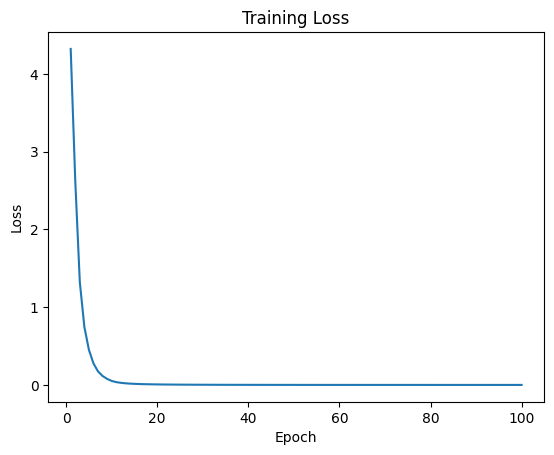

In [ ]:
# 손실 시각화
# plt.figure(figsize=(5,5))
plt.plot(range(1,num_epochs+1), train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
# 추론
max_len=10
model.eval()
test_sentence = ['I am going to the market']
for sent in test_sentence:
  src_tokens =  sent.split() + ["<EOS>"]
  print(f'src_tokens : {src_tokens}')
  src_ids = [ en_word2idx.get(word,0) for word in src_tokens][:max_len]
  print(f'src_ids : {src_ids}')
  src_ids += [en_word2idx["<PAD>"]]*(max_len - len(src_ids))
  print(f'src_ids+ : {src_ids}')
  src = torch.tensor([src_ids]).to(device)
  # encoder
  hidden = model.encoder(src)
  # decoder
  tgt_ids = [ko_word2idx['<SOS>']]
  print(f'tgt_ids : {tgt_ids}')
  for _ in range(max_len):
    tgt = torch.tensor([tgt_ids]).to(device)
    print(f'tgt : {tgt}')
    with torch.no_grad():
      logits, hidden = model.decoder(tgt,hidden)
      pred = logits[:,-1,:].argmax(-1).item()
      print(f'pred : {pred}')
    tgt_ids.append(pred)
    print(f"ko_word2idx['<EOS>'] : {ko_word2idx['<EOS>']}")
    if pred == ko_word2idx['<EOS>']:
      break
  translation = [ko_idx2word[idx] for idx in tgt_ids[1:]]
  print(" ".join(translation))

src_tokens : ['I', 'am', 'going', 'to', 'the', 'market', '<EOS>']
src_ids : [77, 234, 181, 279, 44, 0, 2]
src_ids+ : [77, 234, 181, 279, 44, 0, 2, 0, 0, 0]
tgt_ids : [1]
tgt : tensor([[1]])
pred : 182
ko_word2idx['<EOS>'] : 2
tgt : tensor([[  1, 182]])
pred : 171
ko_word2idx['<EOS>'] : 2
tgt : tensor([[  1, 182, 171]])
pred : 242
ko_word2idx['<EOS>'] : 2
tgt : tensor([[  1, 182, 171, 242]])
pred : 2
ko_word2idx['<EOS>'] : 2
저는 시장에 가고 <EOS>


Transformer Multi-Header Attention 구현
  - Attention Map 시각화

In [114]:
# multihead attention 구현
class MutliHeadAttention(nn.Module):
  def __init__(self,d_model, num_header):
    super().__init__();
    assert d_model % num_header == 0 # 헤드당 차원이 같아야함
    self.d_model = d_model   # 전체 임베딩수
    self.num_header = num_header
    self.d_k = d_model // num_header  # 헤드당 임베딩 차원수(head차원)

    self.W_q = nn.Linear(d_model,d_model)
    self.W_k = nn.Linear(d_model,d_model)
    self.W_v = nn.Linear(d_model,d_model)
    self.W_o = nn.Linear(d_model,d_model)  # head를 합친결과를 다시 반환
  def forward(self, Q, K, V, mask=None):
    batch_size = Q.size(0)  # 현재 배치크기
    # batch, seq_len, d_mdel -=> batch, num_head,seq_len,d_model
    Q = self.W_q(Q).view(batch_size, -1, self.num_header,self.d_k).transpose(1,2)
    K = self.W_q(K).view(batch_size, -1, self.num_header,self.d_k).transpose(1,2)
    V = self.W_q(V).view(batch_size, -1, self.num_header,self.d_k).transpose(1,2)
    # scaled dot production attention 계산
    # 스케일링 -> 스케일링을 하지 않으면 값이 켜져 softmax를 하면 grandient vanishing(기울기 소실)
    scores = torch.matmul(Q,K.transpose(-2,-1)) / np.sqrt(self.d_k)
    if mask is not None:  # mask가 0인 위치를 -1e9로 만들어서 softmax를 통과하면 0되게함(attention을 주지 않음)
      scores = scores.masked_fill(mask==0,-1e9)
    attn_weight =  torch.softmax(scores,dim=-1)
    # attention weight과 value를 곱해서 최종 context vector 계산
    context = torch.matmul(attn_weight,V)
    # 여러해드를 합친다
    context = context.transpose(1,2).contiguous().view(batch_size,-1,self.d_model)
    output = self.W_o(context) # 최종 선형변환
    return output, attn_weight

Transformer 구현 순서
```
1. import.....
2. MultiheadAttention 구현
3. Encoder Layer
  MultiheadAttention 사용
  FeedForward Network 추가
  Layer Normalization + Dropout 적용
4. Decoder Layer
  self-attention
  Encoder-Decoder Attention
  FeedForward Network 추가
  Layer Normalization + Dropout 적용
5. Transfomer 모델 전체 구현
  임베딩
  포지셔널 인코딩
  Encoder stack
  Decoder stack
  출력층
  forward 함수
    마스크 생성
    임베딩 + 포지셔널 인코딩
    Encoder
    Decoder
    최종출력층 -> logit을 출력
```

In [115]:
class EncoderLayer(nn.Module):
  '''
  Args
    d_model : 전체 임베딩 차원
    num_head : 병렬로 수행할 Attention 해드수
    d_ff : feed forward network의 은닉층 차
  '''
  def __init__(self, d_model,num_head,d_ff,dropout=0.1) -> None:
    super().__init__()
    self.mha = MutliHeadAttention(d_model, num_head)
    self.ffn = nn.Sequential(
        nn.Linear(d_model, d_ff),
        nn.ReLU(),
        nn.Linear(d_ff,d_model)
    )
    self.layernormal1 = nn.LayerNorm(d_model)
    self.layernormal2 = nn.LayerNorm(d_model)
    self.dropout = nn.Dropout(dropout)
  def forward(self, x, mask=None):
    attn_output, attn_weights = self.mha(x,x,x,mask)
    x = self.layernormal1(x + self.dropout(attn_output))  #  Residaul connectinon
    ffn_output = self.ffn(x)
    x = self.layernormal2(x + self.dropout(ffn_output))  #  Residaul connectinon
    return x, attn_weights

class DecoderLayer(nn.Module):
  def __init__(self, d_model, num_heads, d_ff,dropout=0.1):
    super().__init__()
    self.mha1 = MutliHeadAttention(d_model, num_heads) # 디코더 자신  (자기자신을 참조) + 미래정보를 masking
    self.mha2 = MutliHeadAttention(d_model, num_heads) # 디코더가 인코더 출력과 어텐션을 수행(소스 문장정보를 읽어오기)
    self.ffn = nn.Sequential(
        nn.Linear(d_model, d_ff),
        nn.ReLU(),
        nn.Linear(d_ff,d_model)
    )
    self.layernormal1 = nn.LayerNorm(d_model)
    self.layernormal2 = nn.LayerNorm(d_model)
    self.layernormal3 = nn.LayerNorm(d_model)
    self.dropout = nn.Dropout(dropout)
  def forward(self, x, enc_output, src_mask=None, tgt_mask=None):
    attn_output, attn_weights1 = self.mha1(x,x,x,tgt_mask)
    x = self.layernormal1(x + self.dropout(attn_output))
    attn_output, attn_weights2 = self.mha2(x,enc_output,enc_output,src_mask)
    x = self.layernormal2(x + self.dropout(attn_output))
    ffn_output = self.ffn(x)
    x = self.layernormal3(x + self.dropout(ffn_output))
    return x, attn_weights1, attn_weights2

In [116]:
# 입력(Embedding + 위치정보)
# 인코더 : 각 문장의 의미를 압축한 은닉층 생성
# 디코더 :  압축한 의미의 데이터를받아서 매번 다음 단어를 예측
#   maksed self attention : 각 단어가 자기보다 뒤에 단어를 보지 못하도록 마스킹
#   encoder docoder attention : 인코더 출력을 참고해서 의미를 해석
#   Feed Forward Network : 위치별 비선형 변환 --> 예측
class Transformer(nn.Module):
  '''
  Args
    src_vocab_size,tgt_vocab_size : 단어사전 크기
    d_model : 전체 임베딩 차원
    num_head : 병렬로 수행할 Attention 해드수
    d_ff : feed forward network의 은닉층 차
    num_layers : Encoder와 Decoder의 개수
  '''
  def __init__(self, src_vocab_size, tgt_vocab_size, d_model=128, num_heads=4, d_ff=512, num_layers=2, dropout=0.1):
      super(Transformer, self).__init__()
      self.src_embedding = nn.Embedding(src_vocab_size, d_model)
      self.tgt_embedding = nn.Embedding(tgt_vocab_size, d_model)
      # RNN 이 아님.. 그래서 순서정보가 없고 병렬처리를 하기때문에 매우 중요
      self.positional_encoding = self.create_positional_encoding(max_len=100, d_model=d_model)
      self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
      self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
      self.fc = nn.Linear(d_model, tgt_vocab_size)
      self.dropout = nn.Dropout(dropout)

  def create_positional_encoding(self, max_len, d_model):  # Attention is All You Need
      pe = torch.zeros(max_len, d_model)
      position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
      div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
      pe[:, 0::2] = torch.sin(position * div_term)
      pe[:, 1::2] = torch.cos(position * div_term)
      return pe.to(device)

  def forward(self, src, tgt):
      # Masks
      src_mask = (src != 0).unsqueeze(1).unsqueeze(2)  # [batch, 1, 1, src_len]
      tgt_mask = self.create_subsequent_mask(tgt.size(1)).to(device)  # [1, tgt_len, tgt_len]

      # Embeddings + Positional Encoding
      # src = self.src_embedding(src) + self.positional_encoding[:src.size(1), :]
      pos_enc = self.positional_encoding[:src.size(1), :].unsqueeze(0)
      src = self.src_embedding(src) + pos_enc  # now shape: (batch_size, seq_len, d_model)

      # tgt = self.tgt_embedding(tgt) + self.positional_encoding[:tgt.size(1), :]
      tgt_enc = self.positional_encoding[:tgt.size(1), :].unsqueeze(0)
      tgt = self.src_embedding(tgt) + tgt_enc  # now shape: (batch_size, seq_len, d_model)


      src = self.dropout(src)
      tgt = self.dropout(tgt)

      # Encoder
      enc_attn_weights = []
      for layer in self.encoder_layers:
          src, attn_weights = layer(src, src_mask)
          enc_attn_weights.append(attn_weights)

      # Decoder
      dec_attn_weights = []
      for layer in self.decoder_layers:
          tgt, attn_weights1, attn_weights2 = layer(tgt, src, src_mask, tgt_mask)
          dec_attn_weights.append(attn_weights2)  # Encoder-Decoder Attention

      logits = self.fc(tgt)  # [batch, seq_len, tgt_vocab_size]
      return logits, enc_attn_weights, dec_attn_weights

  def create_subsequent_mask(self, size):
      mask = torch.triu(torch.ones(size, size), diagonal=1).bool()
      return ~mask.unsqueeze(0)  # [1, size, size]

In [117]:
dataset = TranslationDataset(df, en_word2idx, ko_word2idx)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
len(next(iter(dataloader)))

2

In [118]:
model = Transformer(
    src_vocab_size=len(en_word2idx),
    tgt_vocab_size=len(ko_word2idx),
    d_model=128,
    num_heads=4,
    d_ff=512,
    num_layers=2
).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=ko_word2idx["<PAD>"])
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [119]:
num_epochs = 10
train_losses = []
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    for src, tgt in dataloader:
        src, tgt = src.to(device), tgt.to(device)

        # 순전파
        logits, _, _ = model(src, tgt)  # [batch, seq_len-1, vocab_size]
        loss = criterion(logits.view(-1, logits.size(-1)), tgt.contiguous().view(-1))

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/10], Loss: 3.8597
Epoch [2/10], Loss: 2.6572
Epoch [3/10], Loss: 1.9808
Epoch [4/10], Loss: 1.5062
Epoch [5/10], Loss: 1.1397
Epoch [6/10], Loss: 0.8655
Epoch [7/10], Loss: 0.6563
Epoch [8/10], Loss: 0.4940
Epoch [9/10], Loss: 0.3736
Epoch [10/10], Loss: 0.2918


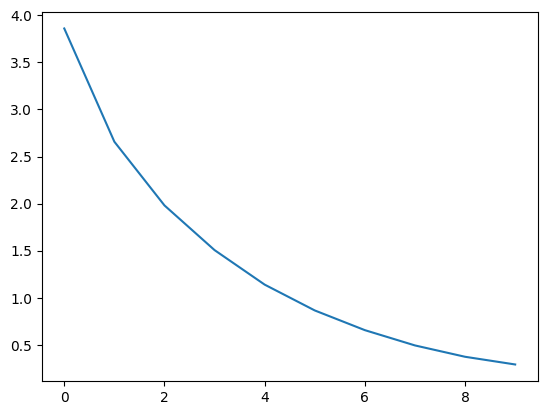

In [120]:
import matplotlib.pyplot as plt
plt.plot(train_losses)

In [121]:
# 번역
sample_text = "They arrived at the airport on time."
model.eval()
src_tokens = sample_text.split() + ["<EOS>"]
src_ids = [en_word2idx.get(word, 0) for word in src_tokens][:15]
src_idsb

NameError: name 'src_idsb' is not defined

오류 수정

사용 디바이스: cpu
Epoch [1/20], Loss: 3.1237
Epoch [2/20], Loss: 2.5635
Epoch [3/20], Loss: 2.0892
Epoch [4/20], Loss: 1.6647
Epoch [5/20], Loss: 1.3077
Epoch [6/20], Loss: 1.0205
Epoch [7/20], Loss: 0.7888
Epoch [8/20], Loss: 0.6270
Epoch [9/20], Loss: 0.5179
Epoch [10/20], Loss: 0.4081
Epoch [11/20], Loss: 0.3425
Epoch [12/20], Loss: 0.2913
Epoch [13/20], Loss: 0.2396
Epoch [14/20], Loss: 0.2062
Epoch [15/20], Loss: 0.1848
Epoch [16/20], Loss: 0.1663
Epoch [17/20], Loss: 0.1427
Epoch [18/20], Loss: 0.1289
Epoch [19/20], Loss: 0.1174
Epoch [20/20], Loss: 0.1058


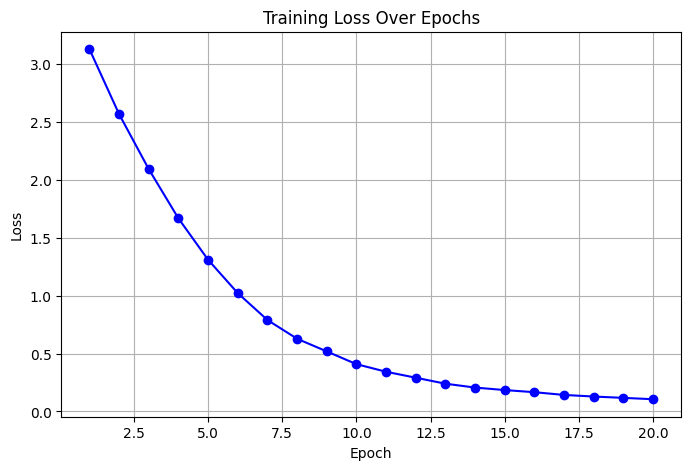


=== 번역 테스트 및 Attention Map ===
Layer 1, Shape: torch.Size([1, 4, 0, 15]), Sample: tensor([], size=(0, 5))
Layer 2, Shape: torch.Size([1, 4, 0, 15]), Sample: tensor([], size=(0, 5))


IndexError: index -1 is out of bounds for dimension 1 with size 0

In [122]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from typing import List, Tuple

# 2. 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"사용 디바이스: {device}")

# 3. 샘플 데이터셋 생성 (100개)
data = [
    ("I eat an apple", "나는 사과를 먹어"),
    ("You run fast", "너는 빨리 달려"),
    ("He sleeps well", "그는 잘 잔다"),
    ("We study hard", "우리는 열심히 공부해"),
    ("They play soccer", "그들은 축구를 해"),
    ("She reads a book", "그녀는 책을 읽어"),
    ("The dog barks", "개가 짖어"),
    ("I love music", "나는 음악을 사랑해"),
    ("You write a letter", "너는 편지를 써"),
    ("He drinks water", "그는 물을 마셔"),
] * 10  # 100개 샘플
df = pd.DataFrame(data, columns=["en", "ko"])

# 4. 단어 사전 생성
def build_vocab(sentences: List[str]) -> Tuple[dict, dict]:
    words = set()
    for sent in sentences:
        words.update(sent.split())
    word2idx = {"<PAD>": 0, "<SOS>": 1, "<EOS>": 2}
    for word in words:
        if word not in word2idx:
            word2idx[word] = len(word2idx)
    idx2word = {idx: word for word, idx in word2idx.items()}
    return word2idx, idx2word

en_word2idx, en_idx2word = build_vocab(df["en"])
ko_word2idx, ko_idx2word = build_vocab(df["ko"])

# 5. 데이터셋 클래스 정의
class TranslationDataset(Dataset):
    def __init__(self, df, en_word2idx, ko_word2idx, max_len=15):
        self.df = df
        self.en_word2idx = en_word2idx
        self.ko_word2idx = ko_word2idx
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        en_sent = self.df.iloc[idx]["en"].split()
        ko_sent = self.df.iloc[idx]["ko"].split()

        en_ids = [self.en_word2idx.get(word, 0) for word in en_sent] + [self.en_word2idx["<EOS>"]]
        ko_ids = [self.ko_word2idx["<SOS>"]] + [self.ko_word2idx.get(word, 0) for word in ko_sent] + [self.ko_word2idx["<EOS>"]]

        en_ids = en_ids[:self.max_len] + [self.en_word2idx["<PAD>"]] * (self.max_len - len(en_ids))
        ko_ids = ko_ids[:self.max_len] + [self.ko_word2idx["<PAD>"]] * (self.max_len - len(ko_ids))

        return torch.tensor(en_ids), torch.tensor(ko_ids), en_sent, ko_sent

# 6. 커스텀 collate_fn 정의
def collate_fn(batch):
    src = torch.stack([item[0] for item in batch])  # [batch, max_len]
    tgt = torch.stack([item[1] for item in batch])  # [batch, max_len]
    en_sents = [item[2] for item in batch]         # List of lists
    ko_sents = [item[3] for item in batch]         # List of lists
    return src, tgt, en_sents, ko_sents

# 7. Multi-Head Attention 구현
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)

    def forward(self, Q, K, V, mask=None):
        batch_size = Q.size(0)

        Q = self.W_q(Q).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        K = self.W_k(K).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        V = self.W_v(V).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)

        scores = torch.matmul(Q, K.transpose(-2, -1)) / np.sqrt(self.d_k)
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        attn_weights = torch.softmax(scores, dim=-1)
        context = torch.matmul(attn_weights, V)

        context = context.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        output = self.W_o(context)
        return output, attn_weights

# 8. Transformer Encoder-Decoder 구현
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super(EncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model)
        )
        self.layernorm1 = nn.LayerNorm(d_model)
        self.layernorm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        attn_output, attn_weights = self.mha(x, x, x, mask)
        x = self.layernorm1(x + self.dropout(attn_output))
        ffn_output = self.ffn(x)
        x = self.layernorm2(x + self.dropout(ffn_output))
        return x, attn_weights

class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super(DecoderLayer, self).__init__()
        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        self.ffn = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model)
        )
        self.layernorm1 = nn.LayerNorm(d_model)
        self.layernorm2 = nn.LayerNorm(d_model)
        self.layernorm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_output, src_mask=None, tgt_mask=None):
        attn_output, attn_weights1 = self.mha1(x, x, x, tgt_mask)
        x = self.layernorm1(x + self.dropout(attn_output))
        attn_output, attn_weights2 = self.mha2(x, enc_output, enc_output, src_mask)
        x = self.layernorm2(x + self.dropout(attn_output))
        ffn_output = self.ffn(x)
        x = self.layernorm3(x + self.dropout(ffn_output))
        return x, attn_weights1, attn_weights2

class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model=128, num_heads=4, d_ff=512, num_layers=2, dropout=0.1):
        super(Transformer, self).__init__()
        self.src_embedding = nn.Embedding(src_vocab_size, d_model)
        self.tgt_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = self.create_positional_encoding(max_len=100, d_model=d_model)
        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.fc = nn.Linear(d_model, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)

    def create_positional_encoding(self, max_len, d_model):
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        return pe.to(device)

    def forward(self, src, tgt):
        # Masks
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)  # [batch, 1, 1, src_len]
        tgt_mask = self.create_subsequent_mask(tgt.size(1)-1).to(device)  # [1, tgt_len-1, tgt_len-1]

        # Embeddings + Positional Encoding
        src = self.src_embedding(src) + self.positional_encoding[:src.size(1), :]
        tgt = self.tgt_embedding(tgt[:, :-1]) + self.positional_encoding[:tgt.size(1)-1, :]
        src = self.dropout(src)
        tgt = self.dropout(tgt)

        # Encoder
        enc_attn_weights = []
        for layer in self.encoder_layers:
            src, attn_weights = layer(src, src_mask)
            enc_attn_weights.append(attn_weights)

        # Decoder
        dec_attn_weights = []
        for layer in self.decoder_layers:
            tgt, attn_weights1, attn_weights2 = layer(tgt, src, src_mask, tgt_mask)
            dec_attn_weights.append(attn_weights2)

        logits = self.fc(tgt)  # [batch, seq_len-1, tgt_vocab_size]
        return logits, enc_attn_weights, dec_attn_weights

    def create_subsequent_mask(self, size):
        mask = torch.triu(torch.ones(size, size), diagonal=1).bool()
        return ~mask.unsqueeze(0)  # [1, size, size]

# 9. 데이터셋 및 데이터로더 준비
dataset = TranslationDataset(df, en_word2idx, ko_word2idx)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

# 10. 모델, 손실 함수, 옵티마이저 설정
model = Transformer(
    src_vocab_size=len(en_word2idx),
    tgt_vocab_size=len(ko_word2idx),
    d_model=128,
    num_heads=4,
    d_ff=512,
    num_layers=2
).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=ko_word2idx["<PAD>"])
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 11. 학습 루프
num_epochs = 20
train_losses = []
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    for src, tgt, _, _ in dataloader:
        src, tgt = src.to(device), tgt.to(device)

        # 순전파
        logits, _, _ = model(src, tgt)  # [batch, seq_len-1, vocab_size]
        loss = criterion(logits.view(-1, logits.size(-1)), tgt[:, 1:].contiguous().view(-1))

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# 12. 손실 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), train_losses, marker='o', color='b')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 13. 번역 테스트 및 Attention Map 시각화
def translate_and_visualize(model, src_text: str, src_words: List[str], max_len=15):
    model.eval()
    src_tokens = src_text.split() + ["<EOS>"]
    src_ids = [en_word2idx.get(word, 0) for word in src_tokens][:max_len]
    src_ids += [en_word2idx["<PAD>"]] * (max_len - len(src_ids))
    src = torch.tensor([src_ids]).to(device)

    # 번역
    tgt_ids = [ko_word2idx["<SOS>"]]
    all_dec_attn_weights = []
    for _ in range(max_len):
        tgt = torch.tensor([tgt_ids]).to(device)
        with torch.no_grad():
            logits, _, dec_attn_weights = model(src, tgt)
            # 디버깅: Attention 가중치 출력
            for i, weights in enumerate(dec_attn_weights):
                print(f"Layer {i+1}, Shape: {weights.shape}, Sample: {weights[0, 0, :5, :5]}")
            pred = logits[:, -1, :].argmax(-1).item()
        tgt_ids.append(pred)
        all_dec_attn_weights.append(dec_attn_weights)
        if pred == ko_word2idx["<EOS>"]:
            break

    translation = [ko_idx2word[idx] for idx in tgt_ids[1:]]

    # Attention Map 시각화 (첫 번째 헤드, 마지막 레이어, 마지막 추론 스텝)
    final_attn_weights = all_dec_attn_weights[-1][-1][0, 0].cpu().numpy()  # [tgt_len, src_len]
    plt.figure(figsize=(10, 8))
    sns.heatmap(final_attn_weights, xticklabels=src_words + ["<EOS>"], yticklabels=translation, cmap="Blues", annot=True, fmt=".2f")
    plt.title("Encoder-Decoder Attention Map (Head 1, Last Layer)")
    plt.xlabel("Source Words")
    plt.ylabel("Target Words")
    plt.show()

    # 로짓 출력
    with torch.no_grad():
        logits, _, _ = model(src, tgt[:, :-1])
        probs = torch.softmax(logits[:, -1, :], dim=-1)
        top_probs, top_ids = torch.topk(probs, 5)
        top_tokens = [ko_idx2word[idx.item()] for idx in top_ids[0]]

    return " ".join(translation), logits[0, -1, :5].cpu().numpy(), top_tokens, top_probs[0].cpu().numpy()

# 테스트 문장
test_sentences = [
    ("I eat an apple", ["I", "eat", "an", "apple"]),
    ("You run fast", ["You", "run", "fast"])
]
print("\n=== 번역 테스트 및 Attention Map ===")
for sent, src_words in test_sentences:
    translation, logits, top_tokens, top_probs = translate_and_visualize(model, sent, src_words)
    print(f"영어: {sent}")
    print(f"한국어: {translation}")
    print(f"마지막 토큰 로짓 (상위 5개): {logits}")
    print(f"마지막 토큰 확률 (상위 5개):")
    for token, prob in zip(top_tokens, top_probs):
        print(f"  토큰: {token}, 확률: {prob:.4f}")

In [123]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
data = [
    ("Hello, how are you?", "안녕하세요, 어떻게 지내세요?"),
    ("I am going to the market.", "저는 시장에 가고 있습니다."),
    ("What time is the meeting?", "회의는 몇 시에 시작하나요?"),
    ("She loves to read books.", "그녀는 책 읽는 것을 좋아합니다."),
    ("We need to finish the project by tomorrow.", "우리는 내일까지 프로젝트를 끝내야 합니다."),
    ("Can you help me with this task?", "이 작업을 도와줄 수 있나요?"),
    ("It's raining heavily today.", "오늘 비가 많이 내리고 있습니다."),
    ("The movie was very interesting.", "그 영화는 매우 흥미로웠습니다."),
    ("I will call you later.", "나중에 전화할게요."),
    ("They are planning a trip to Korea.", "그들은 한국 여행을 계획하고 있습니다."),
    ("Where is the nearest bus stop?", "가장 가까운 버스 정류장은 어디인가요?"),
    ("Please send me the report by email.", "이메일로 보고서를 보내주세요."),
    ("I forgot my password.", "비밀번호를 잊어버렸어요."),
    ("We will meet at the coffee shop.", "우리는 커피숍에서 만날 거예요."),
    ("This cake tastes delicious.", "이 케이크 정말 맛있어요."),
    ("Could you open the window?", "창문을 열어줄 수 있나요?"),
    ("My phone battery is dead.", "제 휴대폰 배터리가 다 닳았어요."),
    ("I like to listen to music.", "저는 음악 듣는 것을 좋아해요."),
    ("Let's have dinner together.", "같이 저녁 먹어요."),
    ("I'm looking for a new job.", "새 직장을 찾고 있어요."),
    ("He is a very talented musician.", "그는 매우 재능 있는 음악가입니다."),
    ("Please wait a moment.", "잠시만 기다려 주세요."),
    ("Can I try this on?", "이거 입어봐도 될까요?"),
    ("The weather is getting colder.", "날씨가 점점 추워지고 있어요."),
    ("I will be there in five minutes.", "5분 안에 도착할게요."),
    ("Turn left at the next corner.", "다음 모퉁이에서 좌회전하세요."),
    ("She speaks three languages fluently.", "그녀는 세 가지 언어를 유창하게 말합니다."),
    ("We had a great time yesterday.", "우리는 어제 정말 즐거운 시간을 보냈어요."),
    ("I need some rest.", "저는 좀 쉬어야 해요."),
    ("The store closes at 9 p.m.", "그 가게는 오후 9시에 문을 닫아요."),
    ("Could you recommend a good restaurant?", "좋은 식당 추천해줄 수 있나요?"),
    ("I lost my wallet.", "지갑을 잃어버렸어요."),
    ("Let's watch a movie tonight.", "오늘 밤 영화 보자."),
    ("I have a lot of homework to do.", "해야 할 숙제가 많아요."),
    ("This room needs cleaning.", "이 방은 청소가 필요해요."),
    ("I like your new haircut.", "새로운 헤어스타일이 마음에 들어요."),
    ("Please turn off the lights.", "불을 꺼주세요."),
    ("The book is on the table.", "책은 테이블 위에 있어요."),
    ("We traveled to Paris last summer.", "우리는 지난 여름에 파리를 여행했어요."),
    ("There is a problem with the computer.", "컴퓨터에 문제가 있어요."),
    ("I'm afraid I can't come today.", "죄송하지만 오늘은 갈 수 없어요."),
    ("How much is this jacket?", "이 재킷은 얼마인가요?"),
    ("I need to buy some groceries.", "장 봐야 해요."),
    ("We should leave early.", "우리는 일찍 출발해야 해요."),
    ("Could you speak more slowly?", "조금 천천히 말씀해주실 수 있나요?"),
    ("The meeting was very productive.", "회의가 매우 생산적이었어요."),
    ("I usually wake up at 7 a.m.", "저는 보통 오전 7시에 일어나요."),
    ("I'm not feeling well today.", "오늘 몸이 좀 안 좋아요."),
    ("I enjoy hiking in the mountains.", "산에서 하이킹하는 것을 즐깁니다."),
    ("What did you do over the weekend?", "주말에 뭐 했어요?"),
    ("Please write it down.", "그걸 적어주세요."),
    ("He forgot to bring his passport.", "그는 여권을 가져오는 것을 잊었어요."),
    ("We are moving to a new house.", "우리는 새 집으로 이사할 거예요."),
    ("This coffee is too hot.", "이 커피는 너무 뜨거워요."),
    ("She has a beautiful voice.", "그녀는 아름다운 목소리를 가지고 있어요."),
    ("I’m interested in learning Korean.", "저는 한국어 배우는 것에 관심이 있어요."),
    ("Do you have any plans for the holiday?", "연휴에 계획 있어요?"),
    ("The park is very crowded today.", "오늘 공원이 매우 붐벼요."),
    ("Please close the door quietly.", "조용히 문을 닫아주세요."),
    ("I will send you the details later.", "자세한 내용을 나중에 보내드릴게요."),
    ("It's important to stay healthy.", "건강을 유지하는 것이 중요해요."),
    ("They arrived at the airport on time.", "그들은 제시간에 공항에 도착했어요."),
    ("The food smells amazing.", "음식 냄새가 정말 좋아요."),
    ("I'm sorry for the inconvenience.", "불편을 드려 죄송합니다."),
    ("He runs faster than me.", "그는 나보다 빨리 달립니다."),
    ("Let’s start the meeting.", "회의를 시작합시다."),
    ("Can I pay by credit card?", "신용카드로 결제할 수 있나요?"),
    ("She wants to become a doctor.", "그녀는 의사가 되고 싶어해요."),
    ("We will have lunch together.", "우리는 함께 점심을 먹을 거예요."),
    ("Turn the volume down, please.", "볼륨을 낮춰주세요."),
    ("I have been waiting for an hour.", "저는 한 시간 동안 기다렸어요."),
    ("The train was delayed.", "기차가 지연됐어요."),
    ("He didn't understand the question.", "그는 질문을 이해하지 못했어요."),
    ("Thank you for your help.", "도와주셔서 감사합니다."),
    ("Please come in.", "들어오세요."),
    ("The museum is closed on Mondays.", "박물관은 월요일에 문을 닫습니다."),
    ("We met at a conference last year.", "우리는 작년에 한 컨퍼런스에서 만났어요."),
    ("I need to charge my laptop.", "노트북을 충전해야 해요."),
    ("This song is very popular.", "이 노래는 매우 인기가 있어요."),
    ("I will check the schedule.", "일정을 확인할게요."),
    ("He has a meeting this afternoon.", "그는 오늘 오후에 회의가 있어요."),
    ("It's my first time visiting Korea.", "한국을 방문하는 것은 처음입니다."),
    ("Can you recommend a good hotel?", "좋은 호텔을 추천해주실 수 있나요?"),
    ("I heard it’s going to snow tomorrow.", "내일 눈이 온다고 들었어요."),
    ("Let's go for a walk.", "산책하러 가자."),
    ("She bought a new laptop yesterday.", "그녀는 어제 새 노트북을 샀어요."),
    ("This room has a nice view.", "이 방은 전망이 좋아요."),
    ("I'm learning how to cook Korean food.", "저는 한국 음식을 요리하는 법을 배우고 있어요."),
    ("He works at a bank.", "그는 은행에서 일합니다."),
    ("Please be careful.", "조심하세요."),
    ("The bus was very crowded.", "버스가 매우 붐볐어요."),
    ("Can you recommend a good book?", "좋은 책 추천해줄 수 있나요?"),
    ("I'm traveling to Japan next month.", "다음 달에 일본으로 여행을 갑니다."),
    ("She is preparing for the exam.", "그녀는 시험 준비를 하고 있어요."),
    ("The weather will be sunny tomorrow.", "내일은 맑을 거예요."),
    ("I'm so happy to see you.", "당신을 만나서 정말 기뻐요."),
    ("The food was delicious.", "음식이 정말 맛있었어요."),
    ("I’ll be back soon.", "곧 돌아올게요."),
]
from sklearn.model_selection import train_test_split
df = pd.DataFrame(data,columns=['en','ko'])
train_df, test_df =  train_test_split(df,test_size=0.2,random_state=42)
len(train_df), len(test_df)

(78, 20)

In [124]:
!pip install huggingface_hub
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "

In [ ]:
from transformers import MarianMTModel, MarianTokenizer,TrainingArguments,Trainer
from huggingface_hub import login
# login('') 

In [126]:
from datasets import Dataset
dataset = Dataset.from_pandas(train_df)

In [127]:
model_name = "Helsinki-NLP/opus-mt-tc-big-en-ko"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/790k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/815k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/959k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/418M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [128]:
def preprocess_function(examples):
    inputs = examples["en"]
    targets = examples["ko"]
    # 입력 토크나이징
    model_inputs = tokenizer(inputs, max_length=30, truncation=True, padding="max_length")
    # 타겟 토크나이징
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=30, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs
train_dataset = dataset.map(preprocess_function, batched=True, remove_columns=["en", "ko"])
train_dataset.set_format("torch")

Map:   0%|          | 0/78 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [129]:
 #학습 설정
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,  # 소규모 데이터셋이므로 에포크 적게
    weight_decay=0.01,
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    report_to="none",  # wandb 비활성화
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)
trainer.train()

Step,Training Loss
10,5.629800
20,3.246500
30,2.060000


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[32000]], 'forced_eos_token_id': 2}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=30, training_loss=3.645426305135091, metrics={'train_runtime': 428.4703, 'train_samples_per_second': 0.546, 'train_steps_per_second': 0.07, 'total_flos': 7428172677120.0, 'train_loss': 3.645426305135091, 'epoch': 3.0})

In [130]:
def translate(model, tokenizer, src_text: str, max_length=30):
  model.eval()
  inputs = tokenizer(src_text, return_tensors="pt", max_length=max_length, truncation=True, padding="max_length").to(device)
  with torch.no_grad():
      outputs = model.generate(
          input_ids=inputs["input_ids"],
          attention_mask=inputs["attention_mask"],
          max_length=max_length,
          num_beams=5
      )
  translation = tokenizer.decode(outputs[0], skip_special_tokens=True)
  return translation

In [131]:
test_sentences = [
    "This song is very popular"
]
for sent in test_sentences:
    translation = translate(model, tokenizer, sent)
    print(f"영어: {sent}")
    print(f"한국어: {translation}\n")

영어: This song is very popular
한국어: PI

